# STEP 0: Use GPU

In [1]:
# Make sure you use the Colab GPU to run the testing phase

import torch
torch.cuda.is_available()

True

In [ ]:
# Show the GPU info

!nvidia-smi

Mon Nov 22 08:06:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# STEP 1: Git clone your project

In [2]:
# Git clone your project

!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10001, done.
remote: Total 10001 (delta 0), reused 0 (delta 0), pack-reused 10001
Receiving objects: 100% (10001/10001), 10.33 MiB | 24.44 MiB/s, done.
Resolving deltas: 100% (6934/6934), done.


# STEP 2: Install your requirements

In [8]:
# Install your requirments (torch, mmcv, ...)
# It is recommended that you wirte the requirements.txt file in your project.

# %cd mmdetection

# !pip install mmcv-full

# !pip install -e .

# !pip install googledrivedownloader

%cd /content/yolov5
!pip install -r /content/yolov5/requirements.txt
!pip install mmcv


/content/yolov5
     |████████████████████████████████| 390 kB 5.3 MB/s 
     |████████████████████████████████| 185 kB 44.8 MB/s 
  Created wheel for mmcv: filename=mmcv-1.3.17-py2.py3-none-any.whl size=573414 sha256=d046fa1e4189ae318f12d371667db604d71e126043d7b3f545c28d91b23b5237
  Stored in directory: /root/.cache/pip/wheels/4d/44/de/6831f4485611ea75714e7e8fad8d12b7f04933481c141f830b
Successfully built mmcv


In [ ]:
# Import your package and check the version

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import mmdet
print(mmdet.__version__)

from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# You must import the below 5 packages 
import os
import cv2
import time
from tqdm import tqdm
from google_drive_downloader import GoogleDriveDownloader as gdd

1.9.0+cu111 True
2.18.0
11.1
GCC 7.5


# STEP 3: Wget testing data 

In [3]:
# 1. Download the testing data

# gdd.download_file_from_google_drive(file_id='1Fm-avdeNgzhPxhvia0iw9yZzcoOggy7I',
#                                     dest_path='./test.zip',
#                                     unzip=True)

# 2. Read the image_name and put them into the list
# You need to modify the path to fit your test_folder
# data_listdir = os.listdir("/content/mmdetection/test")

!gdown --id '1qHKxm9GiwMqI8-yxqogVovdqSjq-2Ret' --output test.zip

#https://drive.google.com/file/d/1wXB_HJeFGJRtGJK-zurz6jEBAyhq0XlM/view?usp=sharing
#https://drive.google.com/file/d/1qHKxm9GiwMqI8-yxqogVovdqSjq-2Ret/view?usp=sharing


Downloading...
From: https://drive.google.com/uc?id=1qHKxm9GiwMqI8-yxqogVovdqSjq-2Ret
To: /content/test.zip
100% 278M/278M [00:01<00:00, 175MB/s]


In [6]:
#Download the model weights
!gdown --id 'dFj4zf9DcsjIWOl2Q09XG4vuzzd2TDXo' --output best.pt
#https://drive.google.com/file/d/1dFj4zf9DcsjIWOl2Q09XG4vuzzd2TDXo/view?usp=sharing


Permission denied: https://drive.google.com/uc?id=dFj4zf9DcsjIWOl2Q09XG4vuzzd2TDXo
Maybe you need to change permission over 'Anyone with the link'?


# STEP 4: Run inferene and bench mark

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

# 1. Load your model and weights
config = '/content/drive/MyDrive/NYCU/VRDL/HW2/VRDL_100_train_config.py'
checkpoint = "/content/drive/MyDrive/NYCU/VRDL/HW2/demo.pth"

# 2. Initialize the model
model = init_detector(config, checkpoint, device='cuda:0')


KeyboardInterrupt: ignored

In [4]:
# unzip testing data
!unzip test.zip -d test_images

Streaming output truncated to the last 5000 lines.
  inflating: test_images/test/150235.png  
  inflating: test_images/__MACOSX/test/._150235.png  
  inflating: test_images/test/12728.png  
  inflating: test_images/__MACOSX/test/._12728.png  
  inflating: test_images/test/79189.png  
  inflating: test_images/__MACOSX/test/._79189.png  
  inflating: test_images/test/268712.png  
  inflating: test_images/__MACOSX/test/._268712.png  
  inflating: test_images/test/414680.png  
  inflating: test_images/__MACOSX/test/._414680.png  
  inflating: test_images/test/465079.png  
  inflating: test_images/__MACOSX/test/._465079.png  
  inflating: test_images/test/48340.png  
  inflating: test_images/__MACOSX/test/._48340.png  
  inflating: test_images/test/365550.png  
  inflating: test_images/__MACOSX/test/._365550.png  
  inflating: test_images/test/98411.png  
  inflating: test_images/__MACOSX/test/._98411.png  
  inflating: test_images/test/25190.png  
  inflating: test_images/__MACOSX/test/._2

### Please **screenshot** this cell, including the code and the output (your inference time), and put it into your report.

In [10]:
# Test your inference time
TEST_IMAGE_NUMBER = 100 # This number is fixed.
test_img_list = []

# Read image (Be careful with the image order)
data_listdir.sort(key = lambda x: int(x[:-4]))
for img_name in data_listdir[:TEST_IMAGE_NUMBER]:
  img_path = os.path.join("/content/mmdetection/test", img_name)
  img = cv2.imread(img_path)
  test_img_list.append(img)

start_time = time.time()
for img in tqdm(test_img_list):
    # your model prediction
    pred = inference_detector(model, img)

end_time  = time.time()
print("\nInference time per image: ", (end_time - start_time) / len(test_img_list))

# Remember to screenshot!

NameError: ignored

In [12]:

# inplemement
!python detect.py --source /content/test_images/test --weights /content/best.pt --conf 0.1

detect: weights=['/content/best.pt'], source=/content/test_images/test, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-102-gf17c86b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 444 layers, 86233975 parameters, 0 gradients, 204.2 GFLOPs
image 1/13068 /content/test_images/test/100000.png: 320x640 1 8, Done. (0.156s)
image 2/13068 /content/test_images/test/100009.png: 288x640 2 0s, Done. (0.137s)
image 3/13068 /content/test_images/test/100059.png: 288x640 2 8s, Done. (0.125s)
image 4/13068 /content/test_images/test/100113.png: 288x640 2 0s, 1 7, Done. (0.123s)
image 5/13068 /content/test_images/test/100190.png: 288x640 1 0, 1 5, 1 7, D

# STEP 5: Generate answer.json for submission on Codalab
The answer.json has the same format as [COCO dataset results](https://cocodataset.org/#format-results)

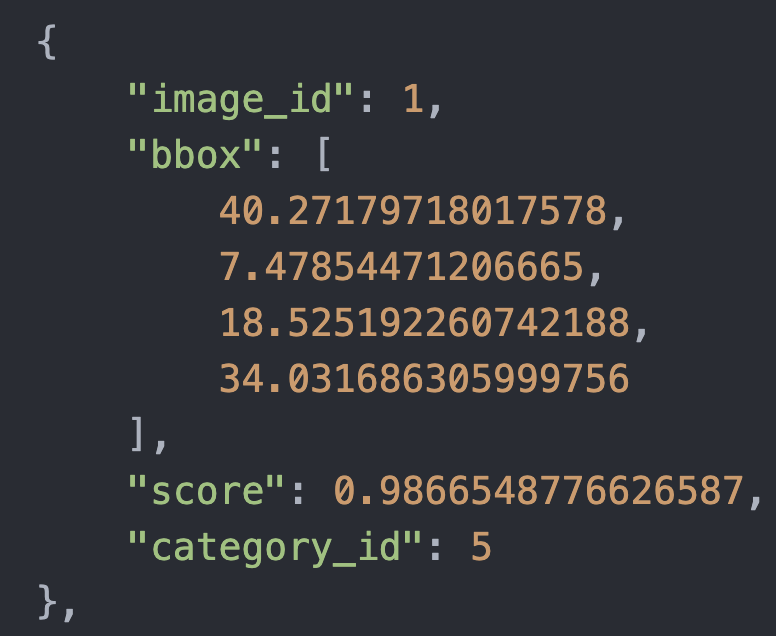

### Pseudo code for generating submission file


In [ ]:
# Use the results from your model to generate the output json file
data_listdir = os.listdir("test_image_dir/")
data_listdir.sort(key = lambda x: int(x[:-4]))
result_to_json = []

# for each test image
for img_name in data_listdir:
    # the image_name is as same as the image_id
    image_id = int(img_name[:-4])

    # add each detection box infomation into list
    your_model_detection_output[img_name] = all_det_boxes_in_this_image

    for det_box in all_det_boxes_in_this_image:
        det_box_info = {}

        # An integer to identify the image
        image_id = det_box_info["image_id"]
        
        # A list ( [left_x, top_y, width, height] )
        det_box["bbox"] = det_box_info["bbox"]
        
        # A float number between 0 ~ 1 which means the confidence of the bbox
        det_box["score"] = det_box_info["score"]
        
        # An integer which means the label class
        det_box["category_id"] = det_box_info["category_id"]
        
        result_to_json.append(det_box_info)

# Write the list to answer.json 
json_object = json.dumps(result_to_json, indent=4)

with open("answer.json", "w") as outfile:
    outfile.write(json_object)


# STEP 6: Share this notebook link on your GitHub/GitLab Readme.MD
Click the share on the right top buttom 